In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [1]:
pip install scikit-surprise

  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp37-cp37m-win_amd64.whl size=806114 sha256=8a16cac95e653b241f690475559cd3b1b444196a0da1dd75008ba9281bef96c4
  Stored in directory: C:\Users\Minju\AppData\Local\pip\Cache\wheels\cc\fa\8c\16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise
Note: you may need to restart the kernel to use updated packages.


In [4]:
import surprise

In [5]:
meta = pd.read_csv('daum-movie-2/metadata.csv')

meta.sample()

,itemid,title,genres,country,running_min
1316,104937,47미터 (2016),공포/스릴러,영국,89


In [6]:
train = pd.read_csv('daum-movie-2/ratings-train.csv')

train.sample()

,userid,itemid,rating
5988,OXU1ZHA=,95306,9


# 영화 코드

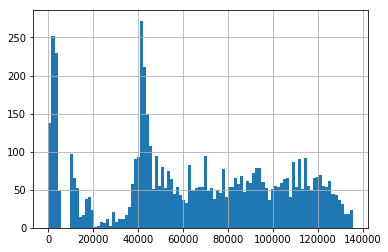

In [23]:
meta['itemid'].hist(bins=100)

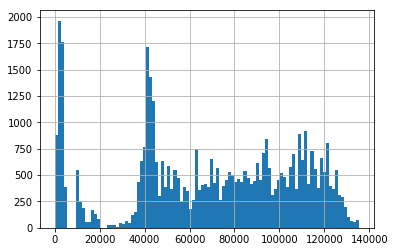

In [22]:
train['itemid'].hist(bins=100)

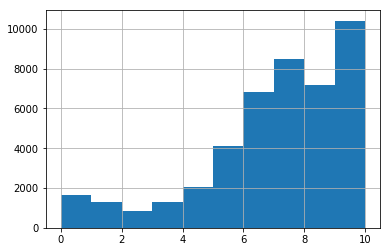

In [19]:
train['rating'].hist()

# 장르별

In [25]:
meta['genres'].hist()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000026D472147B8> (for post_execute):


KeyboardInterrupt: 

In [239]:
df = train.merge(meta, how='outer', on='itemid')

df.sample()

,userid,itemid,rating,title,genres,country,running_min
2830,QkJ1Tw==,89717,2,종이 달 (2014),스릴러/드라마,일본,126


In [240]:
df['main_genres']  = df['genres'].apply(lambda x: str(x).split('/')[0])

pd.DataFrame(df.groupby('main_genres')['rating'].mean()).reset_index().sort_values('rating', ascending=False)

,main_genres,rating
11,서부,7.800000
4,다큐멘터리,7.703476
8,뮤지컬,7.692982
15,애니메이션,7.286727
1,nan,7.142857
18,전쟁,7.043860
5,드라마,6.941574
2,가족,6.932945
17,어드벤처,6.778505
6,로맨스,6.662643


In [36]:
df[df['itemid'] == 55396]

,userid,itemid,rating,title,genres,country,running_min
0,MVdyRkY=,55396,9,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121
1,TzZqVQ==,55396,7,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121
2,REI4WTI=,55396,9,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121
3,bDJ4aA==,55396,7,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121
4,QktyMw==,55396,7,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121
5,NnZnOWU=,55396,5,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121
6,MWNiOE0=,55396,8,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121
7,MkM2Mg==,55396,6,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121
8,RHhWNA==,55396,7,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121
9,NDJLVVo=,55396,6,시라노;연애조작단 (2010),로맨스/멜로/코미디,한국,121


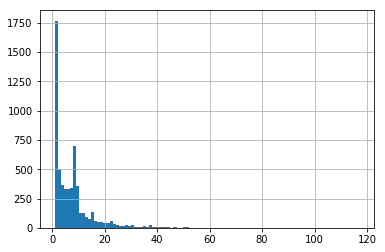

In [39]:
# 영화별 평점 수

df.groupby('itemid')['rating'].size().hist(bins=100)

In [85]:
count_df = pd.DataFrame(df.groupby('itemid')['rating'].size()).reset_index()
# count_df
count_df.sort_values('rating', ascending=False)

row = data['title']
row

# 평점 개수가 40 이상인 영화만 불러오기
# count_df = count_df[count_df > 40].reset_index().merge(meta, how='inner', on='itemid')

# count_df.sample()

0                 기생충 (2019)
1          어벤져스: 엔드게임 (2019)
2                 변호인 (2013)
3                 엑시트 (2019)
4                극한직업 (2018)
5               택시운전사 (2017)
6                1987 (2017)
7                  조커 (2019)
8        어벤져스: 인피니티 워 (2018)
9            보헤미안 랩소디 (2018)
10                알라딘 (2019)
11          신과함께-죄와 벌 (2017)
12             봉오동 전투 (2018)
13                부산행 (2016)
14                안시성 (2017)
15          신과함께-인과 연 (2018)
16               범죄도시 (2017)
17             곡성(哭聲) (2016)
18              캡틴 마블 (2019)
19                악인전 (2019)
20               아쿠아맨 (2018)
21      스파이더맨: 파 프롬 홈 (2019)
22            국가부도의 날 (2018)
23               설국열차 (2013)
24                군함도 (2017)
25                 공작 (2018)
26                 독전 (2018)
27                 밀정 (2016)
28        스파이더맨 : 홈커밍 (2017)
29                 증인 (2018)
30                 마녀 (2018)
31                사바하 (2019)
32                더 킹 (2016)
33                 명량 (2014)
34            

In [55]:
plt.rcParams['font.family'] = 'NanumGothic'

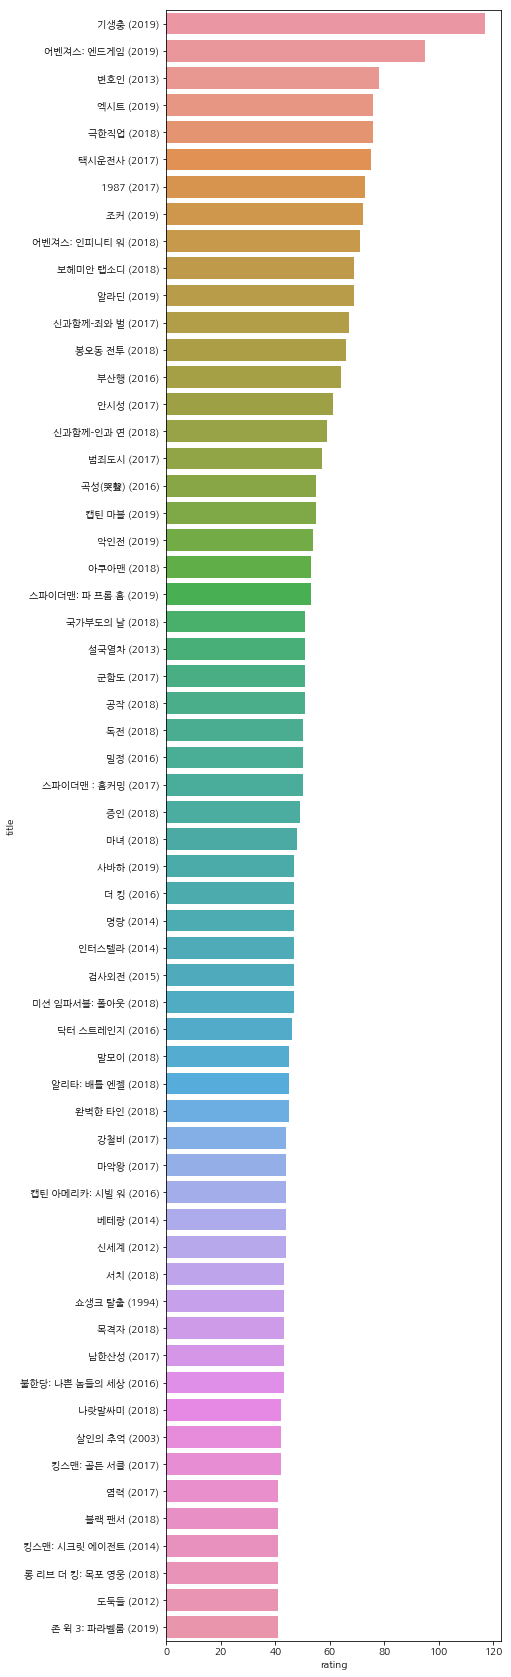

In [61]:
data = count_df.sort_values('rating', ascending=False)
# row = data['title']

plt.figure(figsize=[6, 30])
sns.barplot(x='rating', y='title', data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D5175F0F0>,
      dtype=object)

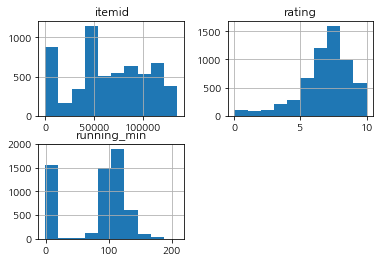

In [83]:
# 평점 median
data = pd.DataFrame(train.groupby('itemid')['rating'].median().reset_index())

median_df = data.merge(meta, how='inner', on='itemid')

median_df.hist()

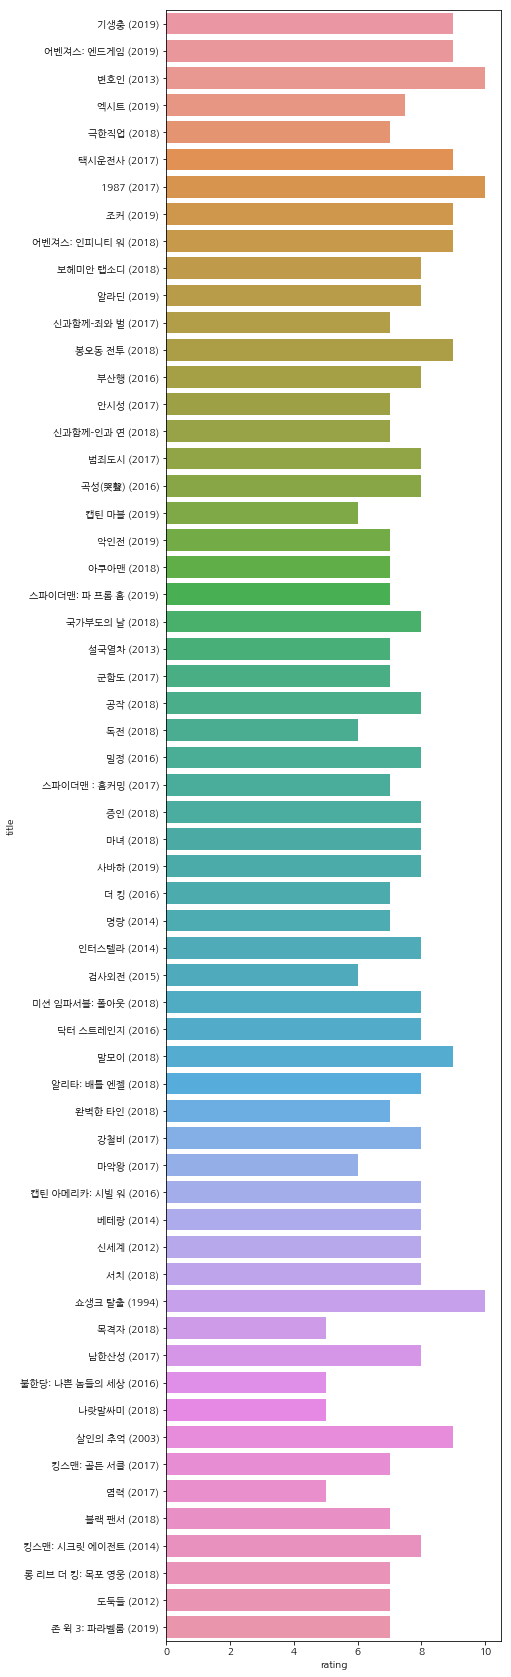

In [84]:
data = median_df.sort_values('rating', ascending=False)

data = pd.DataFrame(row).merge(data, on='title', how='inner')

plt.figure(figsize=[6, 30])
sns.barplot(x='rating', y='title', data=data)

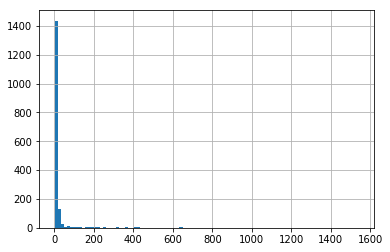

In [38]:
# 아이디별 평점 수

df.groupby('userid')['rating'].count().hist(bins=100)

# 유저별 평점 분포

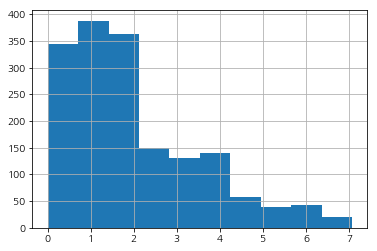

In [194]:
train.groupby('userid')['rating'].std().hist()

## 장르별 분포

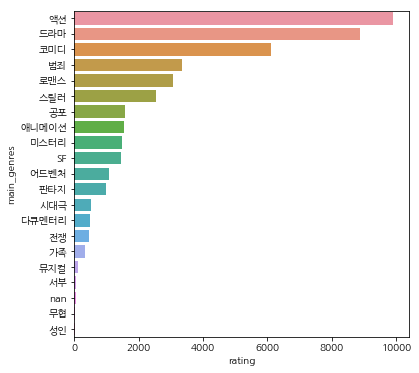

In [244]:
# 장르별 평점 갯수
plt.figure(figsize=[6, 6])
data = pd.DataFrame(df.groupby('main_genres')['rating'].count()).reset_index()
data = data.sort_values('rating', ascending=False)
sns.barplot(x='rating', y='main_genres', data=data)

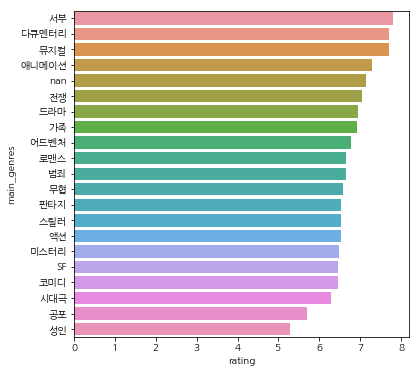

In [245]:
# 장르별 평균 평점
plt.figure(figsize=[6, 6])
data = pd.DataFrame(df.groupby('main_genres')['rating'].mean()).reset_index()
data = data.sort_values('rating', ascending=False)
sns.barplot(x='rating', y='main_genres', data=data)

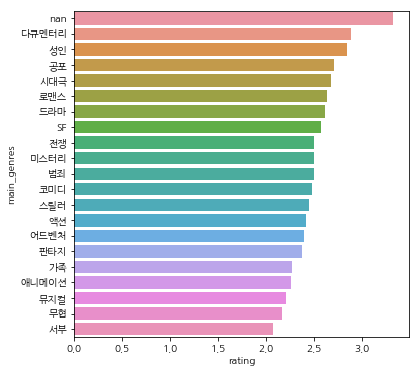

In [247]:
# 장르별 std
plt.figure(figsize=[6, 6])
data = pd.DataFrame(df.groupby('main_genres')['rating'].std()).reset_index()
data = data.sort_values('rating', ascending=False)
sns.barplot(x='rating', y='main_genres', data=data)

# Prediction

In [206]:
def predict(u, i):
    # 임의의 값으로 예측
    return 8.0
    
expected = valid.copy()
expected['rating'] = expected.apply(
    lambda row: predict(row['userid'], row['itemid']), axis=1)

rmse(expected, valid)

2.7423239390279464

In [205]:
rating_mean = train['rating'].mean()

def predict(u, i):
    # 전체 평균으로 예측
    return rating_mean
    
expected = valid.copy()
expected['rating'] = expected.apply(
    lambda row: predict(row['userid'], row['itemid']), axis=1)

rmse(expected, valid)

2.4180319540511177

In [179]:
expected

,userid,itemid,rating
1000,NEpQdHA=,53983,6.0
3543,OTQzaFo=,108037,6.0
4826,M2p2QTk=,87427,6.0
4330,REhkazM=,95755,6.0
3635,MWNiOE0=,70107,6.0
1685,NzZtTHg=,111292,6.0
5242,MkpYaGk=,125049,6.0
2034,RjVKVw==,48632,6.0
1910,REI4WTI=,47519,6.0
1975,M0szalc=,108035,6.0


In [218]:
def predict(u, i):
    # 유저별 평균평점으로 예측
    return train[train['userid'] == u]['rating'].mean()
    
expected = valid.copy()
expected['rating'] = expected.apply(
    lambda row: predict(row['userid'], row['itemid']), axis=1)

rmse(expected, valid)

2.1909154513519233

In [222]:
def predict(u, i):
    # 영화별 평균평점으로 예측
    return train[train['itemid'] == i]['rating'].mean()
    
expected = valid.copy()
expected['rating'] = expected.apply(
    lambda row: predict(row['userid'], row['itemid']), axis=1)

rmse(expected, valid)

2.2378380864468097

## 유사도 Jaccard Similarity

In [258]:
# 함수 기본
def sim(u, v):
    # 합집합 교집합 계산 위해서 set 으로 변환
    u_rating = set(train[train['userid'] == u]['itemid'])
    v_rating = set(train[train['userid'] == v]['itemid'])

    cup = u_rating | v_rating
    if len(cup) == 0: return 0 # 합집합이 0이면 0 division 에러가 나니까 미리 처리
    
    cap = u_rating & v_rating
    
    return len(cap)/ len(cup)

sim('TERhUA==', 'Q1ladXM=')

0.08333333333333333

In [259]:
# 생산성 향상을 위해 i_dict = {userid : itemid} 미리 만들어 둔다
all_users = train['userid'].unique()
i_dict = {u : set(train[train['userid'] == u]['itemid']) for u in all_users}

def sim(u, v):
    # 합집합 교집합 계산 위해서 set 으로 변환
    u_rating = i_dict[u]
    v_rating = i_dict[v]

    cup = u_rating | v_rating
    if len(cup) == 0: return 0 # 합집합이 0이면 0 division 에러가 나니까 미리 처리
    
    cap = u_rating & v_rating
    
    return len(cap)/ len(cup)

sim('TERhUA==', 'Q1ladXM=')

0.08333333333333333

### 비슷한 영화를 소비한 k 명의 소비자 Uu를 찾는 함수 

In [311]:
def similar_users(u, k):

    df = pd.DataFrame(all_users, columns=['userid'])
    answer = []
    
    for v in all_users:
        answer.append(sim(u, v))
        
    df['sim'] = answer
    
#     return df.sort_values('sim', ascending=False)[1:k + 1]

    return pd.DataFrame(df.sort_values('sim', ascending=False)[1:k + 1]['userid'])

similar_users('TERhUA==', 5)

,userid,sim
629,YzkyQQ==,0.142857
570,NGdmcVQ=,0.125000
1395,M2hETGQ=,0.125000
1194,V0NyaQ==,0.111111
1409,QTB5d0E=,0.111111


In [312]:
# list comprehension
def similar_users(u, k):

    df = pd.DataFrame(all_users, columns=['userid'])    
    df['sim'] = [sim(u, v) for v in all_users]
    
    return pd.DataFrame(df.sort_values('sim', ascending=False)[1:k + 1]['userid'])

similar_users('TERhUA==', 5)

,userid
629,YzkyQQ==
570,NGdmcVQ=
1395,M2hETGQ=
1194,V0NyaQ==
1409,QTB5d0E=


In [321]:
# 선생님 코드 따라하기 list(tuple)
def similar_users(u, k):
    
    sims = sorted([(sim(u, v), v) for v in all_users if u != v], reverse=True)
    top_k_users = [v for s, v in sims][:k]
    return pd.DataFrame(top_k_users, columns=['userid'])

similar_users('TERhUA==', 5)

,userid
0,YzkyQQ==
1,NGdmcVQ=
2,M2hETGQ=
3,V0NyaQ==
4,QTB5d0E=


## 유사한 유저를 이용해 평점 예측

In [ ]:
def predict(u, i):
    top_k_users = similar_users(u, 5)

# Validation

## Import Validation Data 
- 데이터 셋이 커서 임의로 샘플링해서 쓴다
- 원래는 그렇게 하면 안됨

In [88]:
# random_state : random number 를 재현가능하도록 생성하는 방법

valid = pd.read_csv('daum-movie-2/ratings-valid.csv').sample(random_state=17, frac=0.2)

In [89]:
valid.count()

userid    1057
itemid    1057
rating    1057
dtype: int64

## rmse 함수 만들기

In [91]:
# 임의로 데이터 생성
expected = valid[1:10]

answer = valid[:10]

In [97]:
answer

,userid,itemid,rating
1000,NEpQdHA=,53983,9
3543,OTQzaFo=,108037,8
4826,M2p2QTk=,87427,7
4330,REhkazM=,95755,3
3635,MWNiOE0=,70107,7
1685,NzZtTHg=,111292,9
5242,MkpYaGk=,125049,5
2034,RjVKVw==,48632,3
1910,REI4WTI=,47519,6
1975,M0szalc=,108035,7


In [166]:
def rmse(expected, answer):
    import numpy as np
    
    df = expected.merge(answer, how='outer', on=['userid', 'itemid'])

    # Null 값 0 으로 채워주기    
    # df.loc[df['rating_x'].isnull(), 'rating_x'] = 0
    df['rating_x'] = df['rating_x'].fillna(0)
    
    sum = 0
    for x, y in zip(df['rating_x'], df['rating_y']):
        sum += (x - y) ** 2
    
    return np.sqrt(sum / len(df)) 

In [168]:
def rmse(expected, answer):
    import numpy as np
    
    df = expected.merge(answer, how='outer', on=['userid', 'itemid'])

    df['rating_x'] = df['rating_x'].fillna(0)
    
    # for 문 안 쓰고 바로
    return np.sqrt(((df['rating_x'] - df['rating_y']) ** 2).mean())

In [169]:
rmse(expected, answer)

2.8460498941515415